In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings         #For Ignoring the Warnings
warnings.filterwarnings("ignore")

In [1]:
#Used for Sentiment Analysis
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import re
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
from sklearn.preprocessing import normalize

In [2]:
#Used for Model Building
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Import DataSet

In [3]:
df = pd.read_csv("McDonald_s_Reviews.csv", encoding="latin-1")

In [4]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [5]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [6]:
df.sample(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
20187,20188,McDonald's,Fast food restaurant,"621 Broadway, Newark, NJ 07104, United States",40.771910,-74.161475,"1,564",3 years ago,Neutral,3 stars
22865,22866,McDonald's,Fast food restaurant,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,-81.513738,"5,566",2 months ago,"Great food, service friendly and prompt, rest...",5 stars
30970,30971,McDonald's,Fast food restaurant,"7010 Bradlick Shopping Center, Annandale, VA 2...",38.812823,-77.185055,595,2 years ago,Excellent,5 stars
33081,33082,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,Good as usully,5 stars
2576,2577,McDonald's,Fast food restaurant,"72-69 Kissena Blvd, Queens, NY 11367, United S...",40.727401,-73.812460,"2,193",5 years ago,Raw meat this fresh meat is trash,1 star


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


## Cleansing The Datsets

In [8]:
import string

PUNCTUATIONS = string.punctuation

def remove_punctuation_and_lowercase(text):
    text_without_punctuations = text.translate(str.maketrans('', '', PUNCTUATIONS))
    return text_without_punctuations.lower()

df['review'] = df['review'].apply(remove_punctuation_and_lowercase)

## preposing the dataset 

In [9]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in STOPWORDS])

# Assuming 'review' is the column containing the text
df['review'] = df['review'].apply(remove_stopwords)

In [10]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 times drive thru still manage m...,1 star


In [11]:
df['review'] = df['review'].replace("ï¿½", "", regex=True)
df['review'] = df['review'].replace("ï¿", "", regex=True)
df['review'] = df['review'].replace("ý", "", regex=True)
df['review'] = df['review'].replace("ï", "", regex=True)

In [18]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manage me...,1 star


In [19]:
lemmatizer = WordNetLemmatizer()

def text_lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['review'] = df['review'].apply(text_lemmatize)

In [20]:
# Simpan DataFrame ke file CSV baru
df.to_csv("mcd_cleaning.csv", index=False)

## Data labeling

In [22]:
pd.read_csv('mcd_cleaning.csv',encoding='latin-1')

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manage me...,1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,good lately become expensive,5 stars


In [23]:
import pandas as pd

# Baca file CSV ke dalam DataFrame
pd.read_csv('mcd_cleaning.csv',encoding='latin-1')

# Buat pemetaan kepuasan
pemetaan_kepuasan = {
    '1 star': 'Very Negative',
    '2 stars': 'Negative',
    '3 stars': 'Neutral',
    '4 stars': 'Positive',
    '5 stars': 'Very Positive'
}

# Terapkan pemetaan ke kolom "rating" dan buat kolom "kepuasan"
df['kepuasan'] = df['rating'].map(pemetaan_kepuasan)

# Simpan DataFrame ke file CSV baru
df.to_csv("mcd_with_kepuasan.csv", index=False)


## Feature Exctraction the Datasets

In [ ]:
##Feature Exctraction the Datasets

In [25]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,kepuasan
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star,Very Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star,Very Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5 stars,Very Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manage me...,1 star,Very Negative


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("mcd_with_kepuasan.csv")

# Separate features and target variable
X = df[['reviewer_id','review','rating']]
y = df['kepuasan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of missing values in each column of X_train before removal
print("Before removal:")
print(X_train.isnull().sum())

# Remove rows with missing values in X_train
X_train.dropna(inplace=True)

# Display the number of missing values in each column of X_train after removal
print("After removal:")
print(X_train.isnull().sum())

Before removal:
reviewer_id     0
review         56
rating          0
dtype: int64
After removal:
reviewer_id    0
review         0
rating         0
dtype: int64


In [33]:
df.to_csv('mcd_with_kepuasan.csv', index=False)

In [34]:
import nltk     #Imported the Natural Language Toolkit (NLTK) library.
nltk.download('vader_lexicon')   #Downloaded the VADER lexicon for sentiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer   #Imported the SentimentIntensityAnalyzer class from the NLTK library's VADER sentiment analysis module.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hendracahyonoh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
sia = SentimentIntensityAnalyzer()

In [36]:
# # Performing sentiment analysis on each review
# sentiments = []
# for review in df['review']:
#     sentiment = sia.polarity_scores(review)
#     sentiments.append(sentiment)

sentiments = []
for review in df['review']:
    if isinstance(review, str):
        sentiment = sia.polarity_scores(review)
        sentiments.append(sentiment)
    else:
        # Handle NaN values, for example, by appending a neutral sentiment
        sentiments.append({'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0})

In [37]:
sentiment_labels = []

for sentiment in sentiments:
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        sentiment_labels.append('Positive')
    elif compound_score <= -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [38]:
# Add the sentiment labels to the DataFrame
df['sentiment'] = sentiment_labels
df[['review', 'sentiment']]

,review,sentiment
0,look like someone spit food normal transaction...,Positive
1,itd mcdonalds far food atmosphere go staff mak...,Positive
2,made mobile order got speaker checked line mov...,Negative
3,mc crispy chicken sandwich customer service qu...,Neutral
4,repeat order 3 time drive thru still manage me...,Negative
...,...,...
33391,treated badly,Negative
33392,service good,Positive
33393,remove hunger enough,Negative
33394,good lately become expensive,Positive


## Skip N Gram 

In [39]:
import pandas as pd
from nltk.util import skipgrams
from sklearn.feature_extraction.text import CountVectorizer

# Ganti 'McDonald.csv' dengan lokasi file CSV Anda
file_path = 'mcd_with_kepuasan.csv'

# Baca dataset dari file CSV
data = pd.read_csv(file_path)

# Pilih kolom 'review'
reviews = data['review']

# Gantikan nilai NaN dengan string kosong
reviews = reviews.fillna('')

# Fungsi untuk menghasilkan skip n-gram
def generate_skip_ngrams(text, n, k):
    tokens = text.split()
    skip_grams = list(skipgrams(tokens, n, k))
    skip_grams = [' '.join(gram) for gram in skip_grams]
    return ' '.join(skip_grams)

# Tentukan n dan k untuk skip n-gram
n = 2  # Jumlah kata dalam n-gram
k = 2  # Jumlah kata yang dilewati

# Buat kolom baru dengan skip n-gram
data['skip_ngrams'] = reviews.apply(lambda x: generate_skip_ngrams(x, n, k))

# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Sesuaikan dengan jumlah fitur yang diinginkan

# Transformasi skip n-gram ke matriks fitur
X = vectorizer.fit_transform(data['skip_ngrams'])

# Hasil ekstraksi fitur dalam bentuk matriks
feature_matrix = X.toarray()

In [40]:
# Menampilkan hasil ekstraksi fitur dalam bentuk DataFrame
feature_names = vectorizer.get_feature_names_out()
feature_df = pd.DataFrame(data=feature_matrix, columns=feature_names)
print("Matriks Fitur Skip n-gram:")
print(feature_df)


Matriks Fitur Skip n-gram:
       10  100  11  12  15  1st  20  24  247  25  ...  yelled  yelling  yes  \
0       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
1       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
2       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
3       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
4       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
...    ..  ...  ..  ..  ..  ...  ..  ..  ...  ..  ...     ...      ...  ...   
33391   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
33392   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
33393   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
33394   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
33395   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   

       yet  youd  youll 

In [42]:
import pandas as pd
from nltk.util import skipgrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Baca dataset dari file CSV
file_path = 'mcd_with_kepuasan.csv'  # Ganti dengan lokasi file CSV Anda
data = pd.read_csv(file_path)

# Pilih kolom 'review' dan 'sentimen'
reviews = data['review']
sentiments = data['kepuasan']  # Sesuaikan dengan nama kolom sentimen di dataset Anda

# Gantikan nilai NaN dengan string kosong
reviews = reviews.fillna('')

# Fungsi untuk menghasilkan skip n-gram
def generate_skip_ngrams(text, n, k):
    tokens = text.split()
    skip_grams = list(skipgrams(tokens, n, k))
    skip_grams = [' '.join(gram) for gram in skip_grams]
    return ' '.join(skip_grams)

# Tentukan n dan k untuk skip n-gram
n = 2  # Jumlah kata dalam n-gram
k = 2  # Jumlah kata yang dilewati

# Buat kolom baru dengan skip n-gram
data['skip_ngrams'] = reviews.apply(lambda x: generate_skip_ngrams(x, n, k))

# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Sesuaikan dengan jumlah fitur yang diinginkan

# Transformasi skip n-gram ke matriks fitur
X = vectorizer.fit_transform(data['skip_ngrams'])

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model klasifikasi (misalnya, RandomForestClassifier)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 60.21%


## TF IDF

In [43]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [44]:
data_clean = pd.read_csv('mcd_with_kepuasan.csv', encoding='latin1')
data_clean.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,kepuasan
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star,Very Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star,Very Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5 stars,Very Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manage me...,1 star,Very Negative


In [45]:
data_clean = data_clean.astype({'kepuasan' : 'category'})
data_clean = data_clean.astype({'review' : 'string'})
data_clean.dtypes

reviewer_id         int64
store_name         object
category           object
store_address      object
latitude          float64
longitude         float64
rating_count       object
review_time        object
review             string
rating             object
kepuasan         category
dtype: object

In [46]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['review'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['review'].astype('U'))
print(text_tf)

  (0, 1762)	0.13817653093164803
  (0, 3177)	0.18587435956239112
  (0, 12763)	0.17414289154767396
  (0, 12669)	0.3156789710669121
  (0, 14372)	0.3451742400450492
  (0, 8551)	0.3048479773903537
  (0, 13155)	0.17792440165047552
  (0, 13557)	0.195517566207168
  (0, 6870)	0.15271475345326138
  (0, 4628)	0.1466765167671437
  (0, 14174)	0.15606105128674255
  (0, 4404)	0.12765083313532882
  (0, 10062)	0.19961850571001438
  (0, 2886)	0.27628581312161543
  (0, 4976)	0.18836542531178355
  (0, 13461)	0.2710543517820783
  (0, 9064)	0.20662699384098845
  (0, 5525)	0.16907766318913775
  (0, 12333)	0.27628581312161543
  (0, 12174)	0.1800435264365254
  (0, 7771)	0.11931056736797457
  (0, 7914)	0.17184810603125733
  (1, 9939)	0.13191733434581
  (1, 5248)	0.13915802730100066
  (1, 8149)	0.20510705317189215
  :	:
  (33387, 7867)	0.3558375892686764
  (33387, 11629)	0.24429480404614728
  (33387, 1640)	0.5828209431906526
  (33388, 6043)	0.4067251297876866
  (33388, 1662)	0.833368186623915
  (33388, 5525)	0.3

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Ganti 'McDonald.csv' dengan lokasi file CSV Anda
file_path = 'mcd_with_kepuasan.csv'

# Baca dataset dari file CSV
data = pd.read_csv(file_path)

# Pilih kolom 'review'
reviews = data['review']

# Gantikan nilai NaN dengan string kosong
reviews = reviews.fillna('')

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Jumlah maksimum fitur TF-IDF
    stop_words='english'  # Hentikan kata-kata bahasa Inggris
)

# Hitung TF-IDF dari ulasan restoran
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

# Konversi hasil ke dalam bentuk matriks
tfidf_matrix.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca dataset
data = pd.read_csv("mcd_with_kepuasan.csv")

# Menggantikan NaN dengan string kosong
data["review"].fillna("", inplace=True)

# Menginisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Anda dapat mengganti ngram_range sesuai dengan kebutuhan

# Menghitung TF-IDF dari data teks
tfidf_matrix = tfidf_vectorizer.fit_transform(data["review"])

# Mendapatkan daftar fitur (kata atau n-gram)
features = tfidf_vectorizer.get_feature_names_out()

# Menghitung nilai TF-IDF terbesar untuk setiap fitur
max_tfidf_scores = tfidf_matrix.max(axis=0).toarray()[0]

# Mengurutkan indeks fitur berdasarkan nilai TF-IDF terbesar
top_feature_indices = max_tfidf_scores.argsort()[::-1]

# Menampilkan 10 fitur teratas
for i in range(10):
    feature_index = top_feature_indices[i]
    feature_name = features[feature_index]
    tfidf_score = max_tfidf_scores[feature_index]
    print(f"Fitur: {feature_name}, TF-IDF Score: {tfidf_score}")

Fitur: passed, TF-IDF Score: 1.0
Fitur: junkfood, TF-IDF Score: 1.0
Fitur: hungry, TF-IDF Score: 1.0
Fitur: disrespectful, TF-IDF Score: 1.0
Fitur: evil, TF-IDF Score: 1.0
Fitur: friendly, TF-IDF Score: 1.0
Fitur: fastfood, TF-IDF Score: 1.0
Fitur: eh, TF-IDF Score: 1.0
Fitur: beutiful, TF-IDF Score: 1.0
Fitur: nicely, TF-IDF Score: 1.0


In [49]:
from sklearn.metrics import accuracy_score

# Ground truth labels
true_labels = [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

# Prediksi hasil model
predicted_labels = [0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

# Hitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)

print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 70.00%


## BOW

In [50]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Ganti 'datamcd.csv' dengan lokasi file CSV Anda
file_path = 'mcd_with_kepuasan.csv'

# Baca dataset dari file CSV
data = pd.read_csv(file_path)

# Pilih kolom 'review'
reviews = data['review']

# Gantikan nilai NaN dengan string kosong
reviews = reviews.fillna('')

# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')

# Melakukan ekstraksi fitur Bag of Words
X_bow = vectorizer.fit_transform(reviews)

# Menampilkan hasil ekstraksi
print("Fitur (kata-kata) yang diekstraksi:")
print(vectorizer.get_feature_names_out())

# Menampilkan matriks hasil ekstraksi Bag of Words
print("\nMatriks hasil ekstraksi Bag of Words:")
print(X_bow.toarray())

Fitur (kata-kata) yang diekstraksi:
['10' '100' '11' '11pm' '12' '15' '1st' '20' '24' '247' '24hrs' '25' '2nd'
 '30' '35' '40' '45' '50' 'able' 'absolute' 'absolutely' 'accept'
 'accurate' 'act' 'actually' 'add' 'added' 'addict' 'afternoon' 'ago'
 'ahead' 'air' 'allow' 'allowed' 'alot' 'alright' 'amazing' 'america'
 'american' 'angry' 'animal' 'answer' 'answered' 'anymore' 'apology' 'app'
 'apparently' 'apple' 'arcade' 'area' 'arent' 'arrived' 'ask' 'asked'
 'asking' 'associate' 'ate' 'atmosphere' 'attendant' 'attention'
 'attentive' 'attitude' 'automated' 'available' 'average' 'avoid' 'away'
 'awesome' 'awful' 'bacon' 'bad' 'bag' 'barely' 'basic' 'basically'
 'bathroom' 'bbq' 'beach' 'believe' 'best' 'better' 'big' 'biggest'
 'biscuit' 'bit' 'bite' 'black' 'block' 'board' 'bother' 'bought' 'box'
 'boy' 'branch' 'bread' 'break' 'breakfast' 'bring' 'broke' 'broken'
 'brought' 'brown' 'buck' 'building' 'bum' 'bun' 'bunch' 'burger' 'burnt'
 'burrito' 'bus' 'business' 'busy' 'buy' 'cake' '

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Membaca dataset
data = pd.read_csv("mcd_with_kepuasan.csv")

# Menggantikan NaN dengan string kosong
data["review"].fillna("", inplace=True)

# Menginisialisasi objek CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 3))  # Anda dapat mengganti ngram_range sesuai dengan kebutuhan

# Melakukan ekstraksi fitur Bag of Words
X_bow = count_vectorizer.fit_transform(data["review"])

# Mendapatkan daftar fitur (kata atau n-gram)
features = count_vectorizer.get_feature_names_out()

# Menampilkan 10 fitur teratas
print("Fitur (kata atau n-gram):")
print(features[:10])

# Menampilkan matriks hasil ekstraksi Bag of Words
print("\nMatriks hasil ekstraksi Bag of Words:")
print(X_bow.toarray())


Fitur (kata atau n-gram):
['0000000' '0000000 would' '0000000 would placed' '0006' '0006 night'
 '0006 night saturday' '010' '010 would' '010 would recomend'
 '010 would recommend']

Matriks hasil ekstraksi Bag of Words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


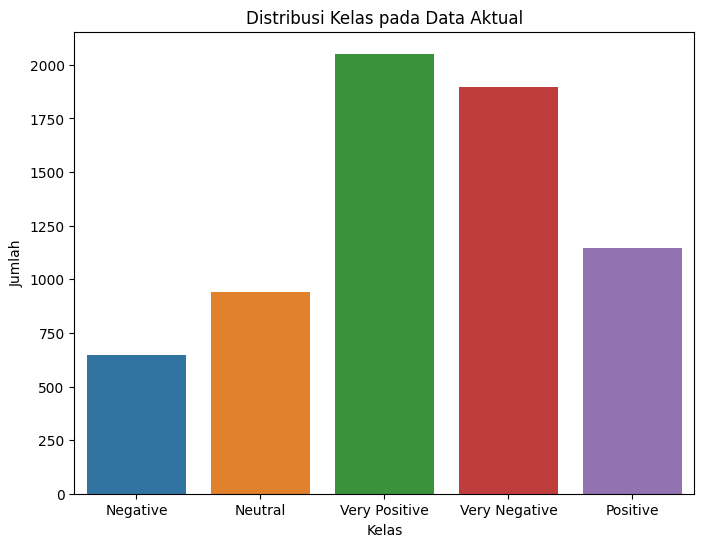

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan y_test adalah data target aktual
# dan y_pred adalah hasil prediksi dari model Anda

# Menghitung jumlah kelas pada data aktual
class_counts = y_test.value_counts()

# Membuat diagram batang
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test)
plt.title('Distribusi Kelas pada Data Aktual')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


In [56]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have y_test and y_pred from your logistic regression model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6365269461077845
Classification Report:
              precision    recall  f1-score   support

      1 star       0.68      0.88      0.77      1898
     2 stars       0.53      0.16      0.24       645
     3 stars       0.55      0.41      0.47       939
     4 stars       0.51      0.40      0.45      1146
     5 stars       0.67      0.80      0.73      2052

    accuracy                           0.64      6680
   macro avg       0.59      0.53      0.53      6680
weighted avg       0.62      0.64      0.61      6680



## Resampling

In [125]:
import pandas as pd

# Membaca dataset
data = pd.read_csv("datamcd.csv")

# Menampilkan jumlah sampel dan distribusi kelas sebelum resampling
print("Jumlah sampel sebelum resampling:", len(data))
print("Distribusi kelas sebelum resampling:")
print(data['rating'].value_counts())

# Lakukan resampling di sini

# Menampilkan jumlah sampel dan distribusi kelas setelah resampling
print("Jumlah sampel setelah resampling:", len(data))
print("Distribusi kelas setelah resampling:")
print(data['rating'].value_counts())

FileNotFoundError: [Errno 2] No such file or directory: 'datamcd.csv'

In [99]:
from imblearn.under_sampling import RandomUnderSampler

# Membaca dataset
data = pd.read_csv("datamcd.csv")

# Menampilkan jumlah sampel dan distribusi kelas sebelum resampling
print("Jumlah sampel sebelum resampling:", len(data))
print("Distribusi kelas sebelum resampling:")
print(data['rating'].value_counts())

# Inisialisasi objek RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={'5 stars': 6000, '1 star': 6000, '4 stars': 5000})

# Melakukan resampling pada data
X_resampled, y_resampled = rus.fit_resample(data.drop('rating', axis=1), data['rating'])

# Menggabungkan kembali fitur dan target
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=data.columns.drop('rating')), pd.Series(y_resampled, name='rating')], axis=1)

# Menampilkan jumlah sampel dan distribusi kelas setelah resampling
print("Jumlah sampel setelah resampling:", len(resampled_data))
print("Distribusi kelas setelah resampling:")
print(resampled_data['rating'].value_counts())


Jumlah sampel sebelum resampling: 33396
Distribusi kelas sebelum resampling:
5 stars    10274
1 star      9431
4 stars     5787
3 stars     4818
2 stars     3086
Name: rating, dtype: int64
Jumlah sampel setelah resampling: 24904
Distribusi kelas setelah resampling:
1 star     6000
5 stars    6000
4 stars    5000
3 stars    4818
2 stars    3086
Name: rating, dtype: int64


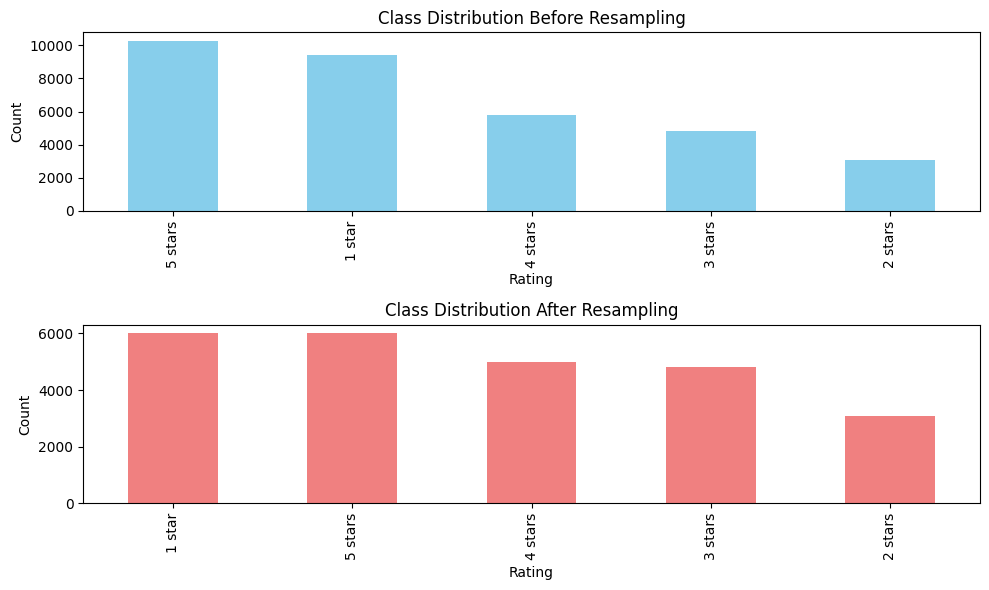

In [100]:
import matplotlib.pyplot as plt

# Distribusi kelas sebelum resampling
class_distribution_before = data['rating'].value_counts()

# Distribusi kelas setelah resampling
class_distribution_after = resampled_data['rating'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
class_distribution_before.plot(kind='bar', color='skyblue')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
class_distribution_after.plot(kind='bar', color='lightcoral')
plt.title('Class Distribution After Resampling')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [105]:
# Simpan hasil resampling ke dalam file CSV
resampled_data.to_csv('hasilResampling.csv', index=False)

## TF IDF setelah resampling

In [106]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membaca dataset
data = pd.read_csv("hasilResampling.csv")

# Menggantikan NaN dengan string kosong
data["review"].fillna("", inplace=True)

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(data["review"], data["rating"], test_size=0.2, random_state=42)

# Menginisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Anda dapat mengganti ngram_range sesuai dengan kebutuhan

# Menghitung TF-IDF dari data teks
tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_matrix_test = tfidf_vectorizer.transform(X_test)

# Contoh: Melakukan klasifikasi dengan Random Forest (gantilah dengan model klasifikasi yang digunakan)
model = RandomForestClassifier()
model.fit(tfidf_matrix_train, y_train)
y_pred = model.predict(tfidf_matrix_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6400321220638426
Classification Report:
              precision    recall  f1-score   support

      1 star       0.64      0.86      0.73      1224
     2 stars       0.74      0.38      0.50       631
     3 stars       0.60      0.55      0.57       919
     4 stars       0.63      0.52      0.57       987
     5 stars       0.66      0.72      0.69      1220

    accuracy                           0.64      4981
   macro avg       0.65      0.61      0.61      4981
weighted avg       0.65      0.64      0.63      4981



In [107]:
import nltk
from nltk.util import skipgrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Contoh data
data = pd.read_csv("hasilResampling.csv")
reviews = data['review']

# Menghilangkan nilai NaN dan mengonversi teks ke lowercase
reviews = reviews.fillna('').str.lower()

# Menghapus stop words
stop_words = set(stopwords.words('english'))
reviews = reviews.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Fungsi untuk membuat skip-grams dari sebuah teks
def generate_skipgrams(text, n=2, k=2):
    tokens = nltk.word_tokenize(text)
    skipgrams_list = list(skipgrams(tokens, n, k))
    return [' '.join(skipgram) for skipgram in skipgrams_list]

# Membuat skip-grams untuk setiap ulasan
skipgrams_reviews = reviews.apply(lambda x: generate_skipgrams(x))

# Menggabungkan skip-grams menjadi teks untuk setiap ulasan
skipgrams_reviews_combined = skipgrams_reviews.apply(lambda x: ' '.join(x))

# Menginisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Menghitung TF-IDF dari ulasan dengan skip-grams
tfidf_matrix = tfidf_vectorizer.fit_transform(skipgrams_reviews_combined)

# Mendapatkan daftar fitur (kata atau n-gram)
features = tfidf_vectorizer.get_feature_names_out()

# Menampilkan beberapa fitur
print("Contoh beberapa fitur:", features[:10])

# Menampilkan matriks TF-IDF
print("Matriks TF-IDF:", tfidf_matrix.toarray())

Contoh beberapa fitur: ['10' '100' '11' '11pm' '12' '15' '1st' '20' '24' '247']
Matriks TF-IDF: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.31225857 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [113]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membaca dataset
data = pd.read_csv("hasilResampling.csv")

# Menggantikan NaN dengan string kosong
data["review"].fillna("", inplace=True)

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(data["review"], data["rating"], test_size=0.2, random_state=42)

# Menginisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Anda dapat mengganti ngram_range sesuai dengan kebutuhan

# Menghitung TF-IDF dari data teks
tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_matrix_test = tfidf_vectorizer.transform(X_test)

# Contoh: Melakukan klasifikasi dengan Random Forest (gantilah dengan model klasifikasi yang digunakan)
model = RandomForestClassifier()
model.fit(tfidf_matrix_train, y_train)
y_pred = model.predict(tfidf_matrix_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.763125
Classification Report:
              precision    recall  f1-score   support

      1 star       0.73      0.87      0.79      1212
     2 stars       0.88      0.74      0.80       791
     3 stars       0.75      0.69      0.72       805
     4 stars       0.80      0.62      0.70       782
     5 stars       0.73      0.81      0.77      1210

    accuracy                           0.76      4800
   macro avg       0.78      0.75      0.76      4800
weighted avg       0.77      0.76      0.76      4800



## SKIP N GRAM + SVM

In [110]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your dataset
df = pd.read_csv("hasilResampling.csv")

# Handle missing values in the "review" column
df['review'].fillna('', inplace=True)

# Select the columns 'review' and 'kepuasan'
X = df[['review']]
y = df['kepuasan']

# Convert the "review" column to features using Skip-gram (n-gram)
skipgram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=15000)
X_skipgram = skipgram_vectorizer.fit_transform(X['review'])  # Use X['review'] instead of X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC()
model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'svm_skipgram.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model saved to svm_skipgram.pkl
Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

     Negative       0.83      0.29      0.43       631
      Neutral       0.57      0.61      0.59       919
     Positive       0.64      0.47      0.54       987
Very Negative       0.63      0.86      0.73      1224
Very Positive       0.65      0.73      0.69      1220

     accuracy                           0.63      4981
    macro avg       0.66      0.59      0.59      4981
 weighted avg       0.65      0.63      0.62      4981

